In [1]:
import torch
import torchvision
import torchaudio
import numpy as np

Epoch 0, Loss: 0.7160
Epoch 1000, Loss: 0.6672
Epoch 2000, Loss: 0.6024
Epoch 3000, Loss: 0.5630
Epoch 4000, Loss: 0.5491

Predictions:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]])


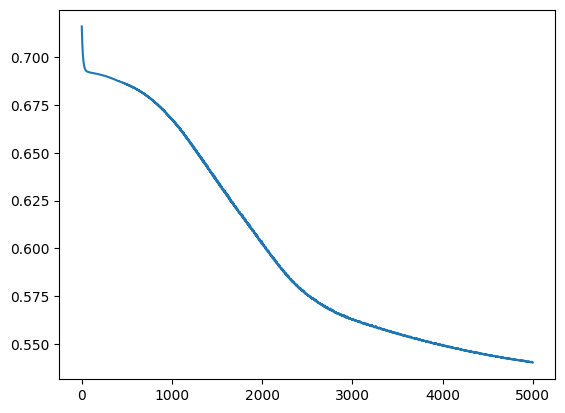

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the XOR Model
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(4, 8)  # Hidden layer with 8 neurons
        self.fc2 = nn.Linear(8, 1)  # Output layer (1 neuron)
        self.activation = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to hidden layer
        x = self.activation(self.fc2(x))  # Sigmoid activation for output
        return x

# Initialize the model
model = XORModel()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define XOR training data (4-bit binary input)
X_train = torch.tensor([
    [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
    [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1],
    [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1],
    [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]
], dtype=torch.float32)

# Expected XOR output (parity bit for 4-bit input)
Y_train = torch.tensor([
    [0], [1], [1], [0],
    [1], [0], [0], [1],
    [1], [0], [0], [1],
    [0], [1], [1], [0]
], dtype=torch.float32)

# Training the model
epochs = 5000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Testing the trained model
with torch.no_grad():
    predictions = model(X_train).round()  # Round to get binary output
    print("\nPredictions:\n", predictions)

plt.plot(losses)    
plt.show()

In [2]:
print(torch.__version__)  
print(torch.cuda.is_available())  
print(torchvision.__version__)
print(torchaudio.__version__)

2.6.0+cu126
True
0.21.0+cu126
2.6.0+cu126


Epoch 0, Loss: 0.6937896013259888
Epoch 100, Loss: 0.6930352449417114
Epoch 200, Loss: 0.6927220821380615
Epoch 300, Loss: 0.692589521408081
Epoch 400, Loss: 0.6925308704376221
Epoch 500, Loss: 0.6925024390220642
Epoch 600, Loss: 0.6924862861633301
Epoch 700, Loss: 0.6924751996994019
Epoch 800, Loss: 0.6924660801887512
Epoch 900, Loss: 0.6924576759338379
Total Parameters: 17

Predictions:
 tensor([0., 1., 0., 1.])


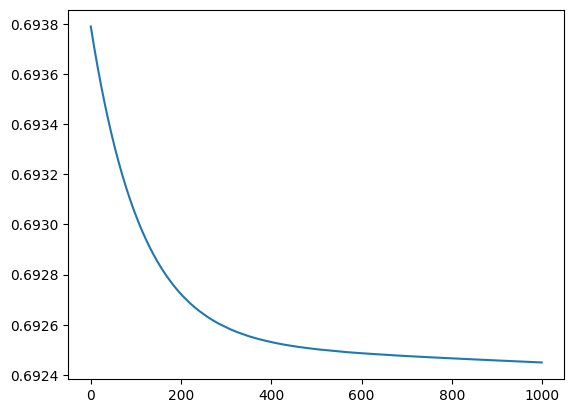

In [11]:
import torch
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1 = nn.Linear(2,4,bias=True)
        self.linear2 = nn.Linear(4,1,bias=True)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        x=self.sigmoid(self.linear1(x))
        x=self.sigmoid(self.linear2(x))
        return x
    

model = XORModel()
criterion = nn.BCELoss()
optimizer= optim.SGD(model.parameters(),lr=0.01)

X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output=model(X)
    loss = criterion(output,Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

total_param = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_param}")

with torch.no_grad():
    predictions = model(X).round()
    print("\nPredictions:\n", predictions.view(-1))

plt.plot(losses)
plt.show()  

In [3]:
torch=torch.tensor([1,2,3])
print(torch)

tensor([1, 2, 3])


In [ ]:
import torch
import numpy as np

# 1. Reshaping, viewing, stacking, squeezing, and unsqueezing of tensors
tensor = torch.arange(12).reshape(3, 4)
print("Original Tensor:", tensor)

# Reshape
tensor_reshaped = tensor.view(2, 6)
print("Reshaped Tensor:", tensor_reshaped)

# Stack tensors along a new dimension
tensor_stacked = torch.stack([tensor, tensor], dim=0)
print("Stacked Tensor:", tensor_stacked.shape)

# Unsqueeze (Add a dimension at position 0)
tensor_unsqueezed = tensor.unsqueeze(0)  
print("Unsqueezed Tensor:", tensor_unsqueezed.shape)

# Squeeze (removes dimensions of size 1)
tensor_squeezed = tensor_unsqueezed.squeeze()
print("Squeezed Tensor:", tensor_squeezed.shape)

# 2. Illustrate the use of torch.permute()
tensor_permuted = tensor.permute(1, 0)  # Swap dimensions
print("Permuted Tensor:", tensor_permuted.shape)

# 3. Indexing in tensors
tensor_indexed = tensor[1, 2]  # Accessing element at row 1, col 2
print("Indexed Element:", tensor_indexed)

# 4. Convert numpy arrays to tensors and vice versa
np_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_from_np = torch.from_numpy(np_array)
numpy_from_tensor = tensor_from_np.numpy()
print("Tensor from Numpy:", tensor_from_np)
print("Numpy from Tensor:", numpy_from_tensor)

# 5. Create a random tensor with shape (7, 7)
random_tensor = torch.rand(7, 7)
print("Random Tensor:", random_tensor)

# 6. Perform matrix multiplication with another tensor of shape (1,7)
another_tensor = torch.rand(1, 7)
matrix_mult_result = torch.mm(random_tensor, another_tensor.T)
print("Matrix Multiplication Result:", matrix_mult_result.shape)

# 7. Create two random tensors of shape (2, 3) and move them to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
tensor1 = torch.rand(2, 3).to(device)
tensor2 = torch.rand(2, 3).to(device)
print("Tensors on GPU:", tensor1.device, tensor2.device)

# 8. Perform matrix multiplication (adjusting shape if needed)
matrix_mult_gpu = torch.mm(tensor1, tensor2.T)  # Transposing tensor2 for proper matmul
print("Matrix Multiplication on GPU:", matrix_mult_gpu)

# 9. Find max and min values
max_value = matrix_mult_gpu.max()
min_value = matrix_mult_gpu.min()
print("Max Value:", max_value, "Min Value:", min_value)

# 10. Find max and min indices
max_index = matrix_mult_gpu.argmax()
min_index = matrix_mult_gpu.argmin()
print("Max Index:", max_index, "Min Index:", min_index)


Original Tensor: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Reshaped Tensor: tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
Stacked Tensor: torch.Size([2, 3, 4])
Unsqueezed Tensor: torch.Size([1, 3, 4])
Squeezed Tensor: torch.Size([3, 4])
Permuted Tensor: torch.Size([4, 3])
Indexed Element: tensor(6)
Tensor from Numpy: tensor([[1, 2, 3],
        [4, 5, 6]])
Numpy from Tensor: [[1 2 3]
 [4 5 6]]
Random Tensor: tensor([[0.8914, 0.2013, 0.8159, 0.1662, 0.2207, 0.1493, 0.3161],
        [0.4454, 0.3513, 0.7165, 0.2609, 0.1431, 0.7583, 0.8584],
        [0.2207, 0.2216, 0.9020, 0.9224, 0.1256, 0.0230, 0.8597],
        [0.9319, 0.6355, 0.4288, 0.0656, 0.9543, 0.8483, 0.6809],
        [0.1931, 0.5362, 0.5775, 0.3158, 0.3821, 0.8826, 0.9818],
        [0.5162, 0.0123, 0.9396, 0.7933, 0.1686, 0.2787, 0.6631],
        [0.5450, 0.4748, 0.1867, 0.1485, 0.2891, 0.5538, 0.7701]])
Matrix Multiplication Result: torch.Size([7, 1])
Tensors on GPU: c

In [5]:
import torch

# Set the seed for reproducibility
torch.manual_seed(7)

# Create a random tensor of shape (1, 1, 1, 10)
tensor_1 = torch.rand(1, 1, 1, 10)

# Remove the dimensions of size 1 to get a tensor of shape (10)
tensor_2 = tensor_1.squeeze()

# Print both tensors and their shapes
print("Tensor 1:", tensor_1)
print("Shape of Tensor 1:", tensor_1.shape)
print("Tensor 2:", tensor_2)
print("Shape of Tensor 2:", tensor_2.shape)


Tensor 1: tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]])
Shape of Tensor 1: torch.Size([1, 1, 1, 10])
Tensor 2: tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])
Shape of Tensor 2: torch.Size([10])


In [6]:
x = torch.rand(3,requires_grad=True)
print(x)


tensor([0.8549, 0.5509, 0.2868], requires_grad=True)


In [7]:
x = torch.tensor(3.5, requires_grad=True)
y = x*x
z = 2*y + 3
print("x: ", x)
print("y: ", y)
print("z: ", z)
# work out gradients
z.backward()
print("Working out gradients dz/dx")
# what is gradient at x = 3.5
print("Gradient at x = 3.5: ", x.grad)

x:  tensor(3.5000, requires_grad=True)
y:  tensor(12.2500, grad_fn=<MulBackward0>)
z:  tensor(27.5000, grad_fn=<AddBackward0>)
Working out gradients dz/dx
Gradient at x = 3.5:  tensor(14.)


In [8]:
def f(x):
    return (x-2)**2

In [9]:
def fp(x):
    return 2*(x-2)

In [10]:
x=torch.tensor([1.0],requires_grad=True)

In [11]:
y=f(x)
y.backward()

In [12]:
print(fp(x))
print(x.grad)

tensor([-2.], grad_fn=<MulBackward0>)
tensor([-2.])


In [13]:
x = torch.tensor([2.0])
x.requires_grad_(True) #indicate we will need the gradients with respect to this variable
y = x**2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [14]:
y.backward() #dy/dx
print('PyTorch gradient:', x.grad)


PyTorch gradient: tensor([4.])


In [15]:
with torch.no_grad(): #this is to only use the tensor value without its gradient information
 dy_dx = 2*x 
print('Analytical gradient:',dy_dx)


Analytical gradient: tensor([4.])


In [16]:
def grad_sigmoid_manual(x):
    a = -x # -x in denominator
    b = np.exp(a) # e^{-x} in denominator
    c = 1 + b # 1 + e^{-x} in denominator
    s = 1.0 / c 
    
    dsdc = (-1.0 / (c**2))
    dsdb = dsdc * 1
    dsda = dsdb * np.exp(a)
    dsdx = dsda * (-1)

    return dsdx

In [17]:
def sigmoid(x):
 y = 1.0 / (1.0 + torch.exp(-x))
 return y

In [18]:
input_x = 2.0
x = torch.tensor(input_x).requires_grad_(True)
y = sigmoid(x)
y.backward()

print('autograd:', x.grad.item())
print('manual:', grad_sigmoid_manual(input_x))

autograd: 0.10499356687068939
manual: 0.1049935854035065


In [19]:
a=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(2.0,requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

In [20]:
z.backward()

In [21]:
print(f"Analytical Gradient (dz/da) is: {2*2 + 3*(10*a).item()}")  
print(f"PyTorch Gradient (dz/da) is: {a.grad.item()}")

Analytical Gradient (dz/da) is: 34.0
PyTorch Gradient (dz/da) is: 34.0


In [22]:
b=torch.tensor(1.0)
x=torch.tensor(2.0)
w=torch.tensor(3.0,requires_grad=True)

u=x*w
v=u+b
a=torch.relu(v)


In [23]:
a.backward()

In [24]:
print(f'da/dw: {w.grad.item()}')

da/dw: 2.0


In [25]:
b=torch.tensor(3.0)
x=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)

u=x*w
v=u+b
a=torch.sigmoid(v)


In [26]:
a.backward()

In [27]:
print(f'da/dw: {w.grad.item()}')

da/dw: 0.013296065852046013


In [28]:
import torch
import math

# Define the function f(x) = exp(-x^2 - 2x - sin(x))
def f(x):
    return torch.exp(-x**2 - 2*x - torch.sin(x))

# Analytical gradient of f(x)
def analytical_gradient(x):
    return torch.exp(-x**2 - 2*x - torch.sin(x)) * (-2*x - 2 - torch.cos(x))

# PyTorch gradient
x = torch.tensor(1.0, requires_grad=True)  # Example point at x = 1.0
y = f(x)

# Perform backpropagation
y.backward()

# Print both gradients
analytical_grad = analytical_gradient(x).item()
pytorch_grad = x.grad.item()

print(f"Analytical Gradient: {analytical_grad}")
print(f"PyTorch Gradient: {pytorch_grad}")


Analytical Gradient: -0.09744400531053543
PyTorch Gradient: -0.09744400531053543


In [29]:
import torch
x=torch.tensor(2.0, requires_grad=True)
y=8*x**4+3*x**3+7*x**2+6*x+3
y.backward()
x.grad

tensor(326.)

In [30]:
y=32*x**3+9*x**2+14*x+6

In [31]:
print(y)

tensor(326., grad_fn=<AddBackward0>)


###Q1

In [32]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader , TensorDataset

In [33]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

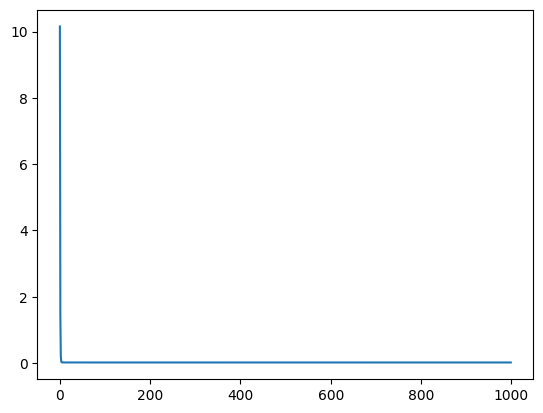

In [34]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

learning_rate=0.001

loss_list = []

for i in range(1000):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.show()


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a 2-hidden-layer Feed Forward Neural Network
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer (784) -> Hidden layer 1 (128)
        self.fc2 = nn.Linear(128, 64)  # Hidden layer 1 (128) -> Hidden layer 2 (64)
        self.fc3 = nn.Linear(64, 10)  # Hidden layer 2 (64) -> Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
model = MNISTModel()
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# Testing loop
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Verify number of learnable parameters
num_params_mnist = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Number of learnable parameters: {num_params_mnist}')


KeyboardInterrupt: 

Epoch 1/5, Loss: 0.1464525152554811
Epoch 2/5, Loss: 0.04534831953584713
Epoch 3/5, Loss: 0.03115933133822395
Epoch 4/5, Loss: 0.02336353686220732
Epoch 5/5, Loss: 0.016845034688475296


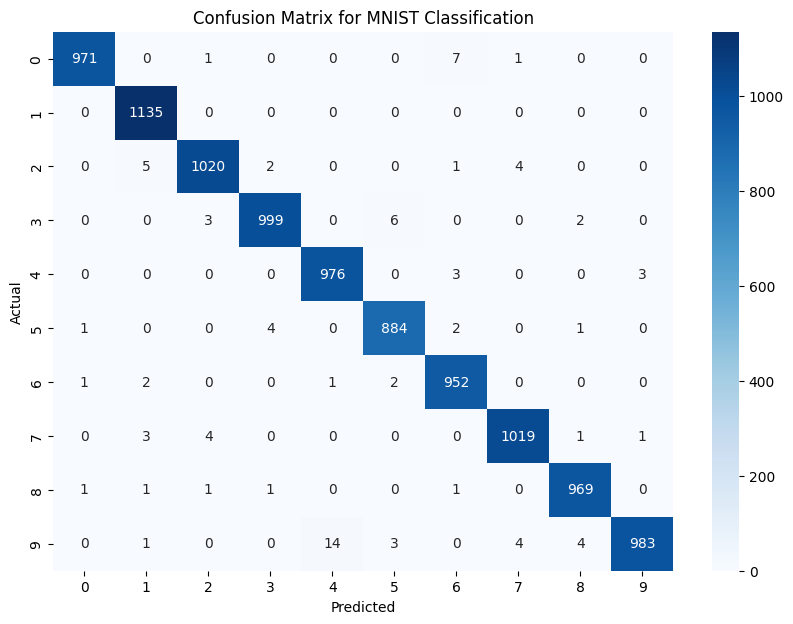

Total learnable parameters in CNN: 421642


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 1 input channel, 32 filters
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Compute Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MNIST Classification")
plt.show()

# Calculate number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Total learnable parameters in CNN: {num_params}")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data
transform = transforms.ToTensor()
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_len = int(0.8 * len(dataset))
val_len = len(dataset) - train_len
train_data, val_data = random_split(dataset, [train_len, val_len])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

model = MLP().to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early Stopping Parameters
best_loss = float('inf')
patience = 3
trigger_times = 0

# Training Loop with Early Stopping
for epoch in range(20):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}")

    # Early Stopping Check
    if val_loss < best_loss:
        best_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        trigger_times += 1
        print(f"Early stopping trigger: {trigger_times}/{patience}")
        if trigger_times >= patience:
            print("Early stopping activated!")
            break


Epoch 1, Validation Loss: 0.2065
Epoch 2, Validation Loss: 0.1439


In [5]:
import torch
import torch.nn as nn

# Dummy input: batch size 1, sequence length 5, input size 10
x = torch.randn(1, 5, 10)

# RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take last time step
        return out

model = RNNModel(input_size=10, hidden_size=20, num_classes=3)
output = model(x)
print("Output shape:", output.shape)


Output shape: torch.Size([1, 3])


In [7]:
import torch
import torch.nn as nn

# Dummy input: batch size 1, sequence length 5, input size 10
x = torch.randn(1, 5, 10)

# LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Last time step
        return out

model = LSTMModel(input_size=10, hidden_size=20, num_classes=2)
output = model(x)
print("Output shape:", output.shape)


Output shape: torch.Size([1, 2])
